# KPI

* Customer segments- Clustering Behaviour- LIFESTAGE AND PREMIUM
* Product - High/ low sales
* Average Spending per Customer Segment
* Preferred Pack Sizes
* Preferred Brand
* Purchase Time Analysis

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# import the dataset

In [2]:
transactionData = pd.read_csv('https://raw.githubusercontent.com/aps0611/Quantium_Business_CASE/main/clean_data/transaction_data_clean.csv', index_col= 0)
transactionData.head(5)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND_NAME
0,2018-10-19,1,1000,1,5,seasalt,2,6.0,175.0,ncc
1,2019-05-16,1,1307,348,66,nacho cheese,3,6.3,175.0,ccs
2,2019-05-22,1,1343,383,61,crinkle cut chips chicken,2,2.9,170.0,smiths
3,2018-08-19,2,2373,974,69,chip thinly s/cream&onion,5,15.0,175.0,smiths
4,2018-08-20,2,2426,1038,108,tortilla chpshny&jlpno chili,3,13.8,150.0,kettle


In [3]:
purchaseData = pd.read_csv("https://raw.githubusercontent.com/aps0611/Quantium_Business_CASE/main/clean_data/QVI_purchase_behaviour.csv")
purchaseData.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [4]:
# merge the datasets:

df = pd.merge(transactionData, purchaseData, how='left', on = 'LYLTY_CARD_NBR')
df.head(5)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND_NAME,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-19,1,1000,1,5,seasalt,2,6.0,175.0,ncc,YOUNG SINGLES/COUPLES,Premium
1,2019-05-16,1,1307,348,66,nacho cheese,3,6.3,175.0,ccs,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-22,1,1343,383,61,crinkle cut chips chicken,2,2.9,170.0,smiths,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-19,2,2373,974,69,chip thinly s/cream&onion,5,15.0,175.0,smiths,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-20,2,2426,1038,108,tortilla chpshny&jlpno chili,3,13.8,150.0,kettle,MIDAGE SINGLES/COUPLES,Budget


# check the outliers in dataset:

<ipython-input-16-6412ccc82566>:8: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.



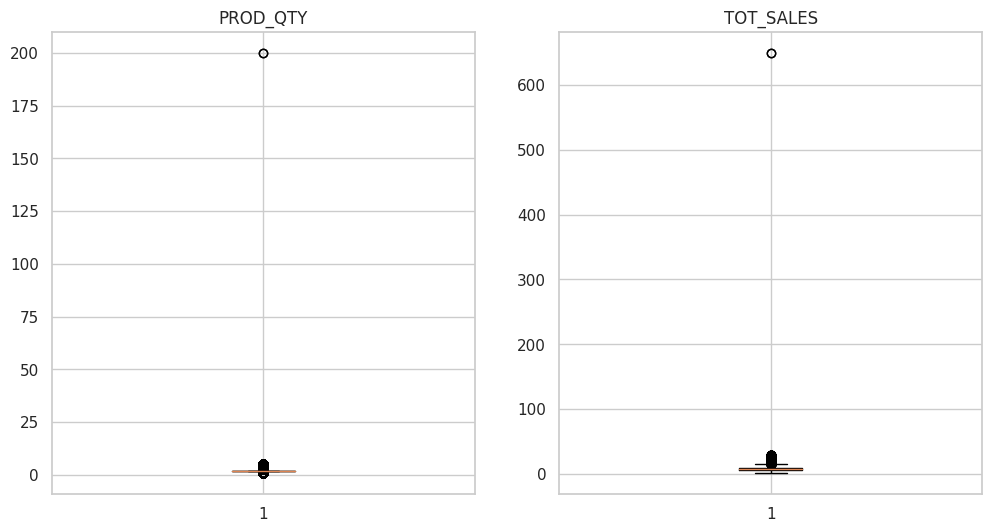

In [16]:
col_num = ['PROD_QTY','TOT_SALES']

plt.figure(figsize=(12, 6))
plt.xticks(rotation=45)
plt.title("Box Plots for Numeric Columns")

for col in col_num:
  plt.subplot(1, len(col_num), col_num.index(col) + 1)
  plt.boxplot(df[col])
  plt.title(col)

In [17]:
df[df['TOT_SALES'] > 600]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND_NAME,LIFESTAGE,PREMIUM_CUSTOMER
69762,2018-08-21,226,226000,226201,4,corn chp supreme,200,650.0,380.0,doritos,OLDER FAMILIES,Premium
69763,2019-05-22,226,226000,226210,4,corn chp supreme,200,650.0,380.0,doritos,OLDER FAMILIES,Premium


In [18]:
df.drop(df[df['TOT_SALES'] > 600].index, inplace=True)

## Total sales for individual Brand:

In [19]:
totSales = pd.DataFrame(df.groupby('BRAND_NAME')['TOT_SALES'].sum().sort_values(ascending=False))
totSales

,TOT_SALES
BRAND_NAME,
kettle,390239.8
doritos,240590.9
smiths,231491.2
pringles,177655.5
infuzions,99047.6
rrd,95046.0
old el paso,90785.1
thins,88852.5
twisties,81522.1


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'kettle'),
  Text(1, 0, 'doritos'),
  Text(2, 0, 'smiths'),
  Text(3, 0, 'pringles'),
  Text(4, 0, 'infuzions'),
  Text(5, 0, 'rrd'),
  Text(6, 0, 'old el paso'),
  Text(7, 0, 'thins'),
  Text(8, 0, 'twisties'),
  Text(9, 0, 'tostitos'),
  Text(10, 0, 'cobs'),
  Text(11, 0, 'sunbites'),
  Text(12, 0, 'tyrrells'),
  Text(13, 0, 'ww'),
  Text(14, 0, 'ncc'),
  Text(15, 0, 'cheezels'),
  Text(16, 0, 'ccs'),
  Text(17, 0, 'cheetos'),
  Text(18, 0, 'french fries')])

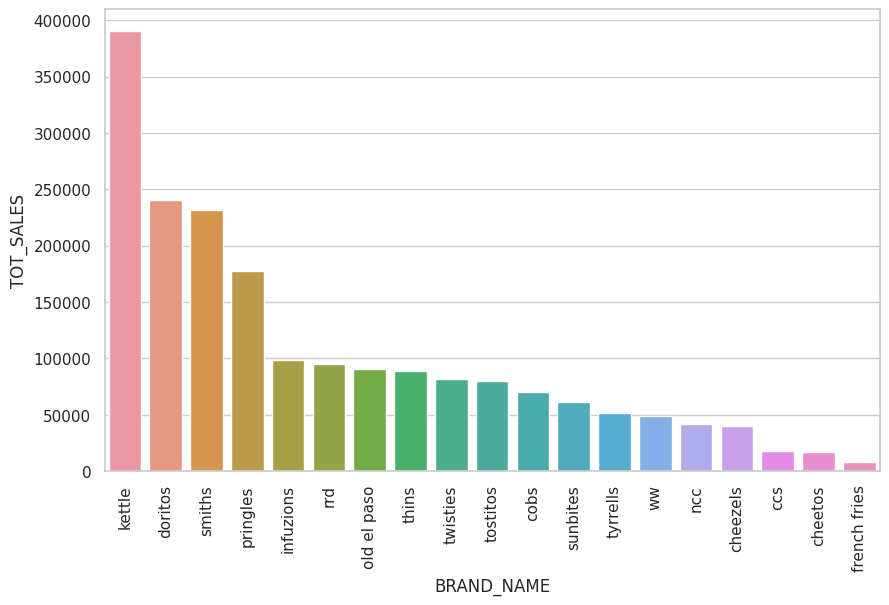

In [20]:
plt.figure(figsize=(10, 6))
sns.barplot(x=totSales.index, y='TOT_SALES', data=totSales)
plt.xticks(rotation=90)

kettle doritos smiths are the brands on which the customer spends the most

# Customer Segment

In [21]:
customerSeg = pd.DataFrame(df.groupby('PREMIUM_CUSTOMER')['TOT_SALES'].sum().sort_values(ascending=False))
customerSeg

,TOT_SALES
PREMIUM_CUSTOMER,
Mainstream,750744.50
Budget,676211.55
Premium,506158.95


Mainstream segment cusotmers spend the most on the products in catalogue while the premium customers spend the least

## Average Spending per customer segment

In [22]:
customerSegMean = pd.DataFrame(df.groupby('PREMIUM_CUSTOMER')['TOT_SALES'].mean().sort_values(ascending=False))
customerSegMean

,TOT_SALES
PREMIUM_CUSTOMER,
Mainstream,7.361106
Premium,7.263111
Budget,7.258838


## PREFERRED PACK SIZE

In [23]:
pd.DataFrame(df['PACK_SIZE'].value_counts()).head()

,PACK_SIZE
175.0,66390
150.0,43131
134.0,25102
110.0,22387
170.0,19983


In [39]:
## smallest pack size:
df['PACK_SIZE'].min()

70.0

In [41]:
## largest pack size:
df['PACK_SIZE'].max()

380.0

Most preferred pack size is 175g while least pack size available is 70g and max size available is 380g

## LIFESTAGE

In [24]:
totSalesLIFE = pd.DataFrame(df.groupby('LIFESTAGE')['TOT_SALES'].sum().sort_values(ascending=False))
totSalesLIFE

,TOT_SALES
LIFESTAGE,
OLDER SINGLES/COUPLES,402426.75
RETIREES,366470.90
OLDER FAMILIES,352467.20
YOUNG FAMILIES,316160.10
YOUNG SINGLES/COUPLES,260405.30
MIDAGE SINGLES/COUPLES,184751.30
NEW FAMILIES,50433.45


oldsingles/couples and retirees are spending the most

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'OLDER SINGLES/COUPLES'),
  Text(1, 0, 'RETIREES'),
  Text(2, 0, 'OLDER FAMILIES'),
  Text(3, 0, 'YOUNG FAMILIES'),
  Text(4, 0, 'YOUNG SINGLES/COUPLES'),
  Text(5, 0, 'MIDAGE SINGLES/COUPLES'),
  Text(6, 0, 'NEW FAMILIES')])

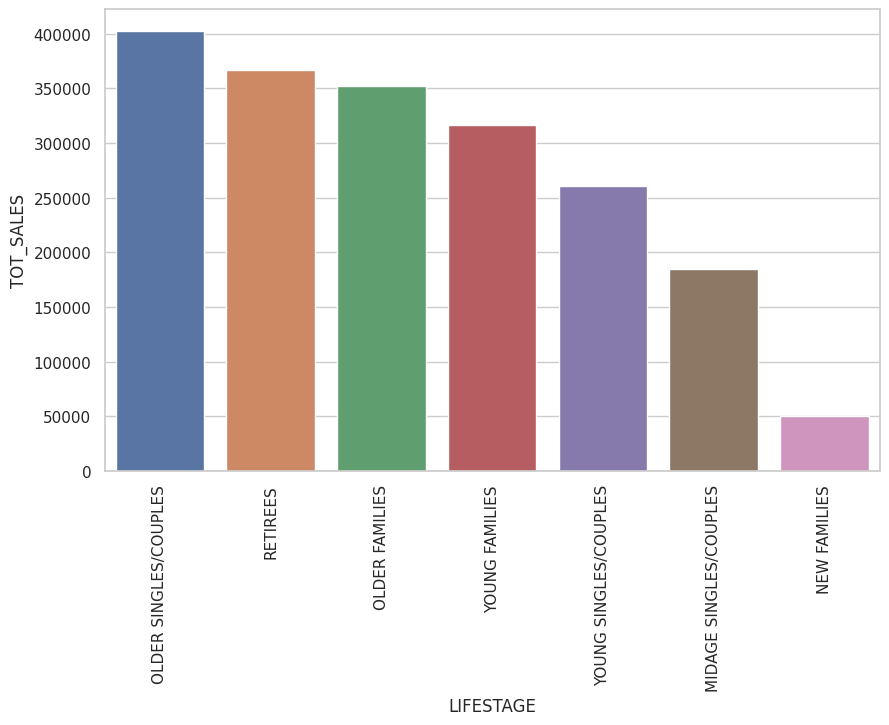

In [25]:
plt.figure(figsize=(10, 6))
sns.barplot(x=totSalesLIFE.index, y='TOT_SALES', data=totSalesLIFE)
plt.xticks(rotation=90)

In [31]:
totQTYLife = pd.DataFrame(df.groupby('LIFESTAGE')['PROD_QTY'].mean().sort_values(ascending=False))
totQTYLife

,PROD_QTY
LIFESTAGE,
OLDER FAMILIES,1.946578
YOUNG FAMILIES,1.939828
OLDER SINGLES/COUPLES,1.912719
MIDAGE SINGLES/COUPLES,1.900478
RETIREES,1.892289
NEW FAMILIES,1.856771
YOUNG SINGLES/COUPLES,1.831762


Older families and younger families in general more packets per customer.

In [27]:
sales_by_date = df.groupby('DATE')['TOT_SALES'].sum()
sales_by_date

DATE
2018-07-03    5372.2
2018-07-04    5315.4
2018-07-05    5321.8
2018-07-06    5309.9
2018-07-07    5080.9
               ...  
2019-06-28    5305.0
2019-06-29    5202.8
2019-06-30    5299.6
2019-07-01    5497.6
2019-07-02    5423.4
Name: TOT_SALES, Length: 364, dtype: float64

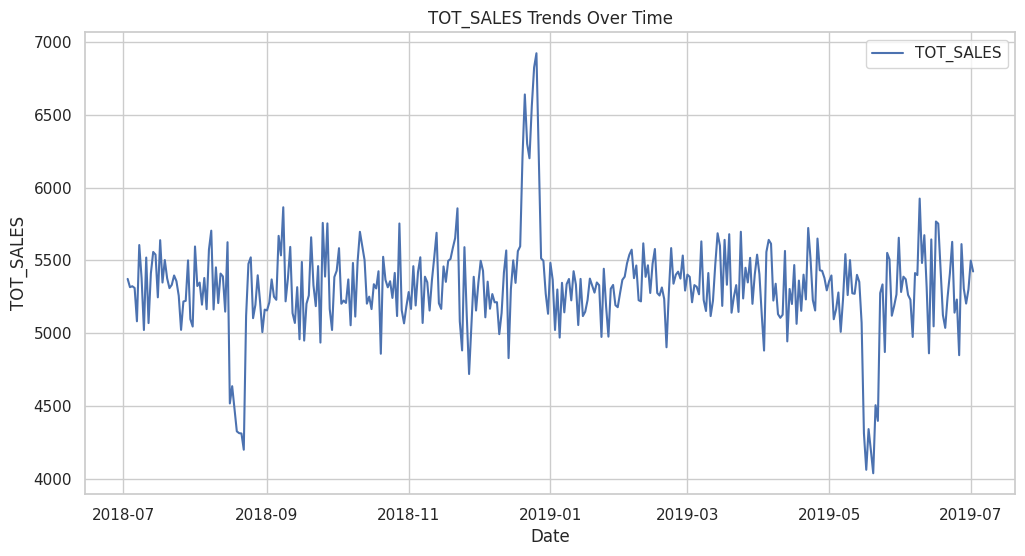

In [28]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))

# Plot the TOT_SALES data over time
sns.lineplot(x=sales_by_date.index, y=sales_by_date.values, label="TOT_SALES")

plt.title('TOT_SALES Trends Over Time')
plt.xlabel('Date')
plt.ylabel('TOT_SALES')
plt.legend()

plt.show()

We can see that there is an increase in purchases in December and a break in late December- Christmas can be the reason for peak in late december

Reduced sales in late AUG 2018 and June 2019


In [36]:
pivot_table = pd.pivot_table(df, values='TOT_SALES', index=['PREMIUM_CUSTOMER','LIFESTAGE'], aggfunc='sum')
pivot_table = pivot_table.groupby('PREMIUM_CUSTOMER', group_keys=False).apply(lambda x: x.sort_values(by='TOT_SALES', ascending=False))
pivot_table

TOT_SALES
PREMIUM_CUSTOMER LIFESTAGE                        
Budget           OLDER FAMILIES          168363.25
                 YOUNG FAMILIES          139345.85
                 OLDER SINGLES/COUPLES   136769.80
                 RETIREES                113147.80
                 YOUNG SINGLES/COUPLES    61141.60
                 MIDAGE SINGLES/COUPLES   35514.80
                 NEW FAMILIES             21928.45
Mainstream       YOUNG SINGLES/COUPLES   157621.60
                 RETIREES                155677.05
                 OLDER SINGLES/COUPLES   133393.80
                 OLDER FAMILIES          103445.55
                 YOUNG FAMILIES           92788.75
                 MIDAGE SINGLES/COUPLES   90803.85
                 NEW FAMILIES             17013.90
Premium          OLDER SINGLES/COUPLES   132263.15
                 RETIREES                 97646.05
                 YOUNG FAMILIES           84025.50
                 OLDER FAMILIES           80658.40
                 MIDAGE SINGLES/COUPLES   58432.65
                 YOUNG SINGLES/COUPLES    41642.10
                 NEW FAMILIES             11491.10

## how many customers in each segment

In [42]:
df['PREMIUM_CUSTOMER'].value_counts()

Mainstream    101988
Budget         93157
Premium        69689
Name: PREMIUM_CUSTOMER, dtype: int64

In [44]:
pivot_table = pd.pivot_table(df, values='TOT_SALES', index=['PREMIUM_CUSTOMER','LIFESTAGE'], aggfunc='count')
pivot_table = pivot_table.groupby('PREMIUM_CUSTOMER', group_keys=False).apply(lambda x: x.sort_values(by='TOT_SALES', ascending=False))
pivot_table

TOT_SALES
PREMIUM_CUSTOMER LIFESTAGE                        
Budget           OLDER FAMILIES              23160
                 YOUNG FAMILIES              19122
                 OLDER SINGLES/COUPLES       18407
                 RETIREES                    15201
                 YOUNG SINGLES/COUPLES        9242
                 MIDAGE SINGLES/COUPLES       5020
                 NEW FAMILIES                 3005
Mainstream       RETIREES                    21466
                 YOUNG SINGLES/COUPLES       20854
                 OLDER SINGLES/COUPLES       18318
                 OLDER FAMILIES              14244
                 YOUNG FAMILIES              12907
                 MIDAGE SINGLES/COUPLES      11874
                 NEW FAMILIES                 2325
Premium          OLDER SINGLES/COUPLES       17754
                 RETIREES                    13096
                 YOUNG FAMILIES              11563
                 OLDER FAMILIES              11190
                 MIDAGE SINGLES/COUPLES       8216
                 YOUNG SINGLES/COUPLES        6281
                 NEW FAMILIES                 1589

In [52]:
pivot_table = pd.pivot_table(df, values='PROD_QTY', index=['PREMIUM_CUSTOMER','LIFESTAGE','BRAND_NAME'], aggfunc='sum')
pivot_table = pivot_table.groupby('PREMIUM_CUSTOMER', group_keys=False).apply(lambda x: x.sort_values(by='PROD_QTY', ascending=False))
pivot_table.to_csv('pivot.csv')

In [50]:
pivot_table = pd.pivot_table(df, values='PROD_QTY', index=['PREMIUM_CUSTOMER', 'BRAND_NAME'], aggfunc='sum')
pivot_table = pivot_table.groupby('PREMIUM_CUSTOMER', group_keys=False).apply(lambda x: x.sort_values(by='PROD_QTY', ascending=False))
top5_brands = pivot_table.groupby('PREMIUM_CUSTOMER').head(5)
top5_brands

PROD_QTY
PREMIUM_CUSTOMER BRAND_NAME          
Budget           kettle         27200
                 smiths         23063
                 doritos        18851
                 pringles       16541
                 rrd            12278
Mainstream       kettle         31334
                 smiths         23406
                 doritos        21357
                 pringles       18861
                 rrd            12241
Premium          kettle         20517
                 smiths         16840
                 doritos        13608
                 pringles       12617
                 rrd             9127

In [51]:
pivot_table = pd.pivot_table(df, values='PROD_QTY', index=['LIFESTAGE', 'BRAND_NAME'], aggfunc='sum')
pivot_table = pivot_table.groupby('LIFESTAGE', group_keys=False).apply(lambda x: x.sort_values(by='PROD_QTY', ascending=False))
top5_brands = pivot_table.groupby('LIFESTAGE').head(5)
top5_brands

PROD_QTY
LIFESTAGE              BRAND_NAME          
MIDAGE SINGLES/COUPLES kettle          7755
                       smiths          5894
                       doritos         5078
                       pringles        4562
                       rrd             3001
NEW FAMILIES           kettle          2191
                       doritos         1479
                       smiths          1454
                       pringles        1324
                       infuzions        729
OLDER FAMILIES         kettle         13367
                       smiths         13183
                       doritos         9471
                       pringles        8266
                       rrd             7596
OLDER SINGLES/COUPLES  kettle         17024
                       smiths         12574
                       doritos        11383
                       pringles       10163
                       rrd             6320
RETIREES               kettle         15568
                       smiths         11030
                       doritos        10389
                       pringles        9432
                       rrd             5570
YOUNG FAMILIES         kettle         12153
                       smiths         11585
                       doritos         8578
                       pringles        7435
                       rrd             6613
YOUNG SINGLES/COUPLES  kettle         10993
                       smiths          7589
                       doritos         7438
                       pringles        6837
                       rrd             3843